Biblioteca que rapidamente avalia os modelos de ML e desenvolve protótipos. Contudo, nao substitui as padrões do mercado, pois possui diversas limitações ao trabalhar com dados desbalanceados.

Fontes: 

* https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763

* https://pycaret.org/setup/

**1. Instalar PyCaret no Colab**

In [1]:
# Instalar PyCaret no Colab
!pip install pycaret 

     |████████████████████████████████| 266kB 5.5MB/s 
     |████████████████████████████████| 276kB 8.0MB/s 
     |████████████████████████████████| 215kB 7.8MB/s 
     |████████████████████████████████| 102kB 6.4MB/s 
     |████████████████████████████████| 6.8MB 8.2MB/s 
     |████████████████████████████████| 1.7MB 43.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 245kB 42.0MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 2.0MB 42.9MB/s 
     |████████████████████████████████| 14.2MB 195kB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 1.1MB 44.0MB/s 
     |████████████████████████████████| 3.2MB 46.2MB/s 
     |████████████████████████████████| 1.2MB 44.9MB/s 
  

**2. Bibliotecas**

In [18]:
# Bibliotecas

import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import pycaret                                        # Pycaret
from pycaret.regression import *                      # Pycaret para Regressão
from pycaret.utils import enable_colab                # Para executar gráficos no Colab

**3. Dataset**

In [4]:
# Lendo arquivo

URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv'
df = pd.read_csv(URL)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**4. Dividindo Dados**

In [6]:
# Dividingo o dataset em treino e teste
train, test = train_test_split(df, test_size=0.2, random_state=42)

**5. Setup de Treino**

In [7]:
# SETUP tenta advinhar se é classificaçao ou regressão de acordo com o atributo

reg = setup(data = train,
            target = 'charges',
            train_size = 0.7)

,Description,Value
0,session_id,1365
1,Target,charges
2,Original Data,"(1070, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(748, 14)"


6. **Treinando e Comparando Modelos**

"A função efetua validação cruzada com 10 folds de diversos modelos. Como nosso problema é do tipo de regressão, ela ordenará a saída do modelo em ordem decrescente do coeficiente de determinação — R²"

In [8]:
# Treinar modelos
compare_models(round=3, sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2772.346,2.397959e+07,4843.842,0.835,0.436,0.310,0.080
lightgbm,Light Gradient Boosting Machine,3052.301,2.560328e+07,5015.882,0.823,0.532,0.367,0.091
rf,Random Forest Regressor,2948.863,2.666352e+07,5119.027,0.816,0.472,0.335,0.506
et,Extra Trees Regressor,2907.576,2.966061e+07,5400.059,0.795,0.469,0.306,0.458
ada,AdaBoost Regressor,4505.123,3.109991e+07,5530.953,0.786,0.624,0.732,0.033
llar,Lasso Least Angle Regression,4271.736,3.894750e+07,6180.230,0.731,0.604,0.426,0.015
ridge,Ridge Regression,4297.029,3.903546e+07,6188.534,0.730,0.571,0.430,0.013
lasso,Lasso Regression,4282.273,3.903572e+07,6187.519,0.730,0.567,0.427,0.014
br,Bayesian Ridge,4294.320,3.904028e+07,6188.689,0.730,0.568,0.430,0.014
lar,Least Angle Regression,4282.816,3.904309e+07,6188.153,0.730,0.567,0.428,0.016


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1365, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

    Comparando os modelos treinados, temos o de melhor perfomance aquele que tiver menor MSE e maior R^2.

In [24]:
# Avaliar performance do Modelo de Baseline
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2682.8841,2.379055e+07,4877.5553,0.8290,0.4062,0.2517
1,2559.7552,2.189438e+07,4679.1435,0.8424,0.4153,0.3183
2,3524.5655,4.355894e+07,6599.9199,0.7520,0.4391,0.2950
3,2385.8963,1.819296e+07,4265.3207,0.8891,0.4193,0.2977
4,2916.3989,2.174162e+07,4662.7909,0.8465,0.4545,0.2650
5,2364.4636,1.430902e+07,3782.7260,0.9026,0.3803,0.3413
6,2569.0340,1.857116e+07,4309.4272,0.8177,0.4204,0.3498
7,3083.5246,2.849540e+07,5338.1079,0.8050,0.4628,0.3480
8,2771.5033,2.509737e+07,5009.7276,0.8053,0.4610,0.3684
9,2865.4319,2.414449e+07,4913.7040,0.8592,0.5042,0.2688


In [11]:
# Tunar Modelo (Busca de Hiperparâmetros)
gbr_tuned = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3354.5497,2.708099e+07,5203.9399,0.8054,0.4802,0.3460
1,3508.8474,3.033364e+07,5507.5981,0.7817,0.6141,0.4220
2,4212.9071,5.110365e+07,7148.6818,0.7090,0.4552,0.3471
3,2808.6885,2.040082e+07,4516.7269,0.8757,0.5210,0.3468
4,3423.6712,2.485075e+07,4985.0526,0.8246,0.5319,0.3320
5,3274.7096,2.018026e+07,4492.2447,0.8626,0.7609,0.4876
6,3446.6099,2.897810e+07,5383.1311,0.7155,0.5438,0.4935
7,3238.0724,2.795865e+07,5287.5937,0.8086,0.5334,0.3518
8,3182.7310,2.756443e+07,5250.1837,0.7862,0.6231,0.4301
9,2875.5425,2.147290e+07,4633.8860,0.8748,0.5288,0.2950


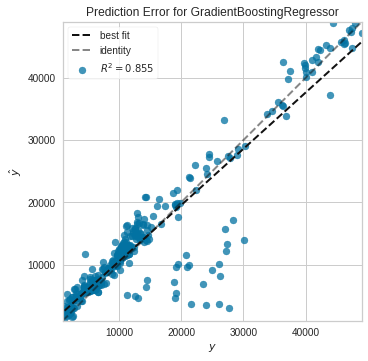

In [12]:
# Comparar predições e resultados do banco de teste
# Se for um problema de classificação apresenta um gráfico, se for regressão, outro.
plot_model(gbr, plot='error')

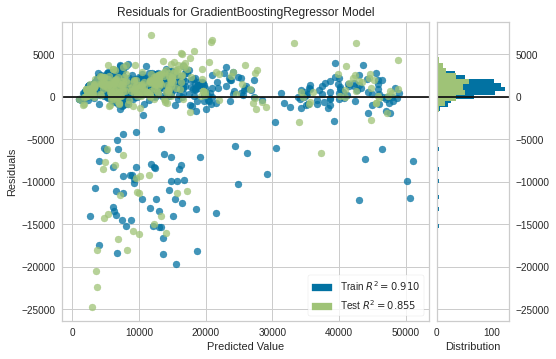

In [13]:
# Comparar os resíduos
plot_model(gbr, plot='residuals')

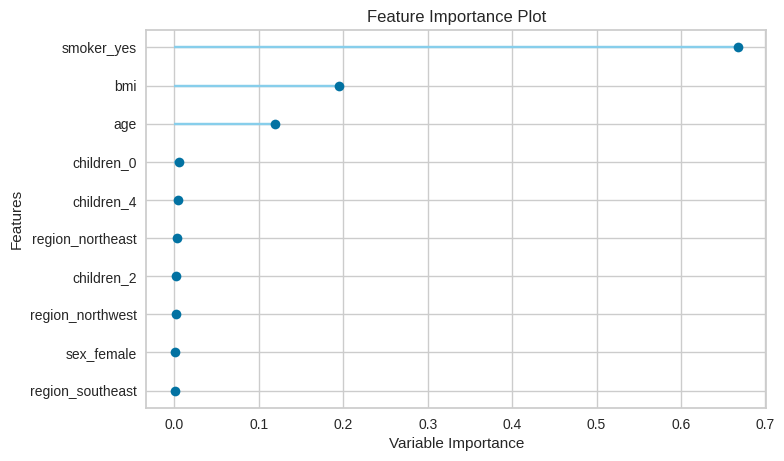

In [14]:
plot_model(gbr, 'feature')

Pode-se ver que os atributos com maiores impactos tem haver com cigarro, obesidade e idade.

**7. Salvando o Modelo**

In [25]:
pred_holdout = predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2532.149,2.007636e+07,4480.6655,0.8547,0.4148,0.2671


In [27]:
# Finalize model
final_rf = finalize_model(gbr)

In [29]:
# Salvando Modelo
save_model(final_rf, 'snf_saved_04072020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           